<a href="https://colab.research.google.com/github/JackSD/Data-Science-Work/blob/master/Copy_of_1_predict_class_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/practicaldl/Practical-Deep-Learning-Book/blob/master/code/chapter-2/1-predict-class.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/practicaldl/Practical-Deep-Learning-Book/blob/master/code/chapter-2/1-predict-class.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This code is part of [Chapter 2 - What’s in the Picture: Image Classification with Keras](https://learning.oreilly.com/library/view/practical-deep-learning/9781492034858/ch02.html).

In [0]:
try:
  import google.colab
  IS_COLAB_ENV = True
except:
  IS_COLAB_ENV = False
IS_COLAB_ENV

True

In [0]:
if IS_COLAB_ENV:
    !pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 89kB/s 
     |████████████████████████████████| 3.8MB 36.4MB/s 
     |████████████████████████████████| 450kB 49.4MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: google-auth-oauthlib 0.4.0
    Uninstalling google-auth-oauthlib-0.4.0:
      Successfully uninstalled google-auth-oauthlib-0.4.0
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.0
    Uninstalling tensorflow-estimator-1.15.0:
      Successfully uninstalled tensorflow-estimator-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


# Predict Category of an Image

The image classification task simply answers the question “Does the image contain X” where X can be a cat, dog or any other category/class of objects. In this file, we see the code for predicting categories for an image.

We start off by importing all the necessary modules from Keras and Python packages. Numpy here gives us the ability to transform matrices, while Matplotlib is graph plotting library that also allows us to display images.

In [0]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Once we have imported our libraries, we will load and display our test image in a 224x224 resolution.

In [0]:
IMG_PATH = '../../sample-images/cat.jpg'
if IS_COLAB_ENV:
  !curl https://raw.githubusercontent.com/PracticalDL/Practical-Deep-Learning-Book/master/sample-images/cat.jpg --output cat.jpg
  IMG_PATH = 'cat.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  661k  100  661k    0     0  2815k      0 --:--:-- --:--:-- --:--:-- 2827k


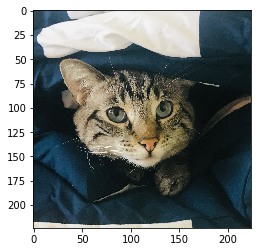

In [0]:
img = image.load_img(IMG_PATH, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [0]:
model = tf.keras.applications.resnet50.ResNet50()

102981632/102967424 [==============================] - 1s 0us/step


Our model has previously been trained only to accept a batch of images. `expand_dims` adds an extra dimension to the array, thereby creating an array of arrays (or a batch of one image).

In [0]:
def classify(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    model = tf.keras.applications.resnet50.ResNet50()
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model.predict(img_preprocessed)
    print(decode_predictions(prediction, top=3)[0])

In [0]:
classify(IMG_PATH)

49152/35363 [=========================================] - 0s 0us/step
[(u'n02123045', u'tabby', 0.5681726), (u'n02124075', u'Egyptian_cat', 0.22223175), (u'n02123159', u'tiger_cat', 0.061033934)]


# Transfer learning

In [0]:
# Let's take a look at the base model architecture
import tensorflow_datasets as tfds

# lets get some images of cats and dogs and specialize the classifier 

In [0]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=[  tfds.Split.TRAIN.subsplit(tfds.percent[:80]),  
           tfds.Split.TRAIN.subsplit(tfds.percent[80:90]),
           tfds.Split.TRAIN.subsplit(tfds.percent[90:100]),
           ],
    with_info=True,
    as_supervised=True,
)

W0306 09:39:52.165646 140567350790016 ag_logging.py:146] Entity <bound method FeaturesDict.decode_example of FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string, encoder=None),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Mangled names are not yet supported by AutoGraph
W0306 09:39:52.286463 140567350790016 ag_logging.py:146] Entity <bound method FeaturesDict.decode_example of FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string, encoder=None),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph

    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string, encoder=None),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Mangled names are not yet supported by AutoGraph
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string, encoder=None),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Mangled names are not yet supported by AutoGraph


W0306 09:39:52.409383 140567350790016 ag_logging.py:146] Entity <bound method FeaturesDict.decode_example of FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string, encoder=None),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Mangled names are not yet supported by AutoGraph


    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string, encoder=None),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Mangled names are not yet supported by AutoGraph


In [0]:
print(raw_train)
print(raw_validation)
print(raw_test)

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


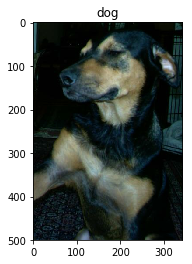

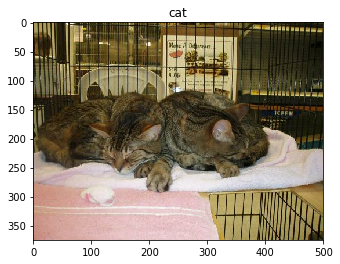

In [0]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

# reszing the images 

In [0]:
IMG_SIZE = 224 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [0]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [0]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 224, 224, 3])

# now, building the new, extended model based on the model above 

In [0]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
base_model = tf.keras.applications.resnet50.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [0]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 2048)


In [0]:
base_model.trainable = False

In [0]:
# Let's take a look at the base model architecture
base_model.summary()

**add a pooling layer and a binary classification layer**

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [0]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [0]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [0]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
initial_epochs = 10
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 150s 7s/step - loss: 0.7252 - accuracy: 0.5188


# ok, now the model has been specialized on cats and dogs, lets see how good it is with the original image

**negative numbers predict class 0, positive numbers predict class 1**

In [0]:
from tensorflow.keras.preprocessing import image

img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
prediction = model.predict(img_preprocessed)
prediction

array([[-1.2469022]], dtype=float32)

# looking at the learning curves

In [0]:
history = model.fit(train_batches,
                    epochs=1,
                    validation_data=validation_batches)

    122/Unknown - 1054s 9s/step - loss: 0.3756 - accuracy: 0.8320

# Lets look at the learning curves

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

NameError: ignored